### An Exploratory Analysis of a Consumer Electronics Dataset with K Nearest Neighbors and K Means with Data Preprocessing.

We are given a csv file of 10,000 observations from a consumer electronics department. The purpose of this study is to exercise some dataset preparation / pre-processing and the use of various querying options and techniques such as Boolean indexing from within the framework of pandas and NumPy arrays.

Before we begin, we will need to explore the dataframe and actively seek out missing, invalid, and abnormal values within our observations. 
- The feature values are expected to be either 1 or 0 for products, remove invalid observations.
- Zip Codes will need to be scanned for invalid numerical ranges.
- Customer ages will need to fall within a reasonable range.
- Datatypes will need to be typecast to the appropriate type.
- rows/records/tuples/transactions in the data frame that have missing values for fields/columns will be removed
- rows/records/tuples/transactions in the data frame that have invalid/abnormal values for fields/columns will be removed

We will then explore the data through queries, and also try to discern patterns through Collaborative Filtering and some clustering.

In [1]:
import pandas as pd 
import numpy as np 
from pandas import DataFrame, Series

In [2]:
dirtydata4bestdeal=pd.read_csv('Data4BestDeal10000.csv')

After improrting the data, we take a look at any potential problems within the feature values.

In [3]:
dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


Our first step is to remove the observations with NaN values, rather than try to replicate missing information, as we have approximately 10,000 observations to work with.

In [4]:
cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


We use boolean indexing to perform a value_counts check on any invalid Zip Codes that may be within our dataset, removing 56 observations:

In [5]:
cleandata4bestdeal[cleandata4bestdeal.ZipCode > 99999]['ZipCode'].value_counts()

830134.0    8
794158.0    8
960616.0    8
930134.0    8
844114.0    8
990033.0    8
860616.0    8
Name: ZipCode, dtype: int64

In [6]:
cleandata4bestdeal[cleandata4bestdeal.ZipCode > 99999]['ZipCode']

clean_df = cleandata4bestdeal[cleandata4bestdeal.ZipCode <= 99999]
clean_df.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


Remove any customers with an invalid age range, we have chosen here to only include customers between 18 and 99 years old. Then we have a look at the overall value_counts, most of our customers are 23, 44 and 27 years of age:

In [7]:
clean_df2 = clean_df[(clean_df.CustomerAge >= np.int64(18)) & (clean_df.CustomerAge < np.int64(100))]
clean_df2['CustomerAge'].value_counts()

23.0    775
44.0    536
27.0    513
37.0    504
25.0    497
34.0    488
28.0    487
29.0    472
43.0    464
38.0    457
35.0    365
26.0    352
54.0    289
22.0    281
31.0    216
21.0    209
36.0    200
49.0    192
32.0    184
56.0    184
24.0    184
33.0    184
42.0    184
46.0    151
57.0    144
45.0    128
59.0    120
51.0    104
47.0    104
39.0    104
41.0     96
55.0     72
61.0     32
53.0     24
30.0     16
Name: CustomerAge, dtype: int64

Remove any non-Boolean values for the Samsung 46 LED TV:

In [8]:
clean_df3 = clean_df2[(clean_df2.SamsungTV46LED <= 1) & (clean_df2.SamsungTV46LED >= 0)]

In [9]:
clean_df3['SamsungTV46LED'].value_counts()

1    6253
0    3059
Name: SamsungTV46LED, dtype: int64

We have a look at the various datatypes within our dataset. We will need to typecast the objects and float64 to integers.

In [10]:
clean_df3.dtypes

ZipCode               float64
CustomerAge           float64
SamsungTV46LED          int64
SonyTV42LED            object
XBOX360                object
DellLaptop             object
BoseSoundSystem        object
BoseHeadSet           float64
SonyHeadSet           float64
iPod                  float64
iPhone                float64
Panasonic50LED        float64
SonyPS4               float64
WiiU                  float64
WDexternalHD          float64
SamsungTV55LED        float64
SonyTV60LED           float64
SandiskMemoryCard     float64
SonySoundSystem       float64
SonyCamera              int64
PanasonicCamera         int64
HPPrinter             float64
SonyDVDplayer         float64
ToshibaDVDplayer      float64
GalaxyTablet            int64
SurfaceTablet         float64
HPLaptop              float64
HDMICable             float64
SpeakerCable          float64
CallOfDutyGame        float64
GrandTheftAutoGame    float64
ASUSLaptop            float64
LenevoLaptop          float64
TVStandWal

Check for any NULL values within our data, drop the observations as needed:

In [11]:
print(clean_df3[pd.to_numeric(clean_df3['SonyTV42LED'], errors='coerce').isnull()])

      ZipCode  CustomerAge  SamsungTV46LED SonyTV42LED XBOX360 DellLaptop  \
9942   2109.0         43.0               1                                  

     BoseSoundSystem  BoseHeadSet  SonyHeadSet  iPod        ...         \
9942               0          0.0          0.0   0.0        ...          

      GalaxyTablet  SurfaceTablet  HPLaptop  HDMICable  SpeakerCable  \
9942             0            0.0       1.0        0.0           1.0   

      CallOfDutyGame  GrandTheftAutoGame  ASUSLaptop  LenevoLaptop  \
9942             1.0                 1.0         0.0           0.0   

      TVStandWallMount  
9942                 1  

[1 rows x 34 columns]


In [12]:
clean_df3.drop(9942, inplace=True)

In [13]:
print(clean_df3[pd.to_numeric(clean_df3['XBOX360'], errors='coerce').isnull()])

      ZipCode  CustomerAge  SamsungTV46LED SonyTV42LED XBOX360 DellLaptop  \
9644  60616.0         44.0               1           1                      

     BoseSoundSystem  BoseHeadSet  SonyHeadSet  iPod        ...         \
9644                          1.0          1.0   0.0        ...          

      GalaxyTablet  SurfaceTablet  HPLaptop  HDMICable  SpeakerCable  \
9644             0            0.0       1.0        0.0           1.0   

      CallOfDutyGame  GrandTheftAutoGame  ASUSLaptop  LenevoLaptop  \
9644             0.0                 0.0         0.0           1.0   

      TVStandWallMount  
9644                 0  

[1 rows x 34 columns]


In [14]:
clean_df3.drop(9644, inplace=True)

In [15]:
# need to convert objects and float64 to int64
clean_df3['ZipCode'] = clean_df3['ZipCode'].astype(int)
clean_df3['CustomerAge'] = clean_df3['CustomerAge'].astype(int)
clean_df3['SonyTV42LED'] = clean_df3['SonyTV42LED'].astype(int)
clean_df3['XBOX360'] = clean_df3['XBOX360'].astype(int)
clean_df3['DellLaptop'] = clean_df3['DellLaptop'].astype(int)
clean_df3['BoseSoundSystem'] = clean_df3['BoseSoundSystem'].astype(int)
clean_df3['BoseHeadSet'] = clean_df3['BoseHeadSet'].astype(int)
clean_df3['SonyHeadSet'] = clean_df3['SonyHeadSet'].astype(int)
clean_df3['iPod'] = clean_df3['iPod'].astype(int)
clean_df3['iPhone'] = clean_df3['iPhone'].astype(int)
clean_df3['Panasonic50LED'] = clean_df3['Panasonic50LED'].astype(int)
clean_df3['SonyPS4'] = clean_df3['SonyPS4'].astype(int)
clean_df3['WiiU'] = clean_df3['WiiU'].astype(int)
clean_df3['WDexternalHD'] = clean_df3['WDexternalHD'].astype(int)
clean_df3['SamsungTV55LED'] = clean_df3['SamsungTV55LED'].astype(int)
clean_df3['SonyTV60LED'] = clean_df3['SonyTV60LED'].astype(int)
clean_df3['SandiskMemoryCard'] = clean_df3['SandiskMemoryCard'].astype(int)
clean_df3['SonySoundSystem'] = clean_df3['SonySoundSystem'].astype(int)
clean_df3['HPPrinter'] = clean_df3['HPPrinter'].astype(int)
clean_df3['SonyDVDplayer'] = clean_df3['SonyDVDplayer'].astype(int)
clean_df3['ToshibaDVDplayer'] = clean_df3['ToshibaDVDplayer'].astype(int)
clean_df3['SurfaceTablet'] = clean_df3['SurfaceTablet'].astype(int)
clean_df3['HPLaptop'] = clean_df3['HPLaptop'].astype(int)
clean_df3['HDMICable'] = clean_df3['HDMICable'].astype(int)
clean_df3['SpeakerCable'] = clean_df3['SpeakerCable'].astype(int)
clean_df3['CallOfDutyGame'] = clean_df3['CallOfDutyGame'].astype(int)
clean_df3['GrandTheftAutoGame'] = clean_df3['GrandTheftAutoGame'].astype(int)
clean_df3['ASUSLaptop'] = clean_df3['ASUSLaptop'].astype(int)
clean_df3['LenevoLaptop'] = clean_df3['LenevoLaptop'].astype(int)

Continue to check for invalid integer values within the product features:

In [16]:
clean_df3['SonyTV42LED'].value_counts()

1    7493
0    1817
Name: SonyTV42LED, dtype: int64

In [17]:
clean_df3['XBOX360'].value_counts()

1    7506
0    1804
Name: XBOX360, dtype: int64

In [18]:
clean_df3['DellLaptop'].value_counts()

1     4857
0     4445
11       8
Name: DellLaptop, dtype: int64

Remove the invalid values in-place, and observe the descriptive statistics of the data:

In [19]:
# remove the invalid values
clean_df3 = clean_df3[clean_df3.DellLaptop <= 1]
clean_df3 = clean_df3[clean_df3.BoseSoundSystem <= 1]
clean_df3 = clean_df3[clean_df3.BoseHeadSet <= 1]
clean_df3 = clean_df3[clean_df3.iPod <= 1]
clean_df3 = clean_df3[clean_df3.WiiU <= 1]
clean_df3 = clean_df3[clean_df3.SamsungTV55LED <= 1]
clean_df3 = clean_df3[clean_df3.HPPrinter <= 1]
clean_df3 = clean_df3[clean_df3.SurfaceTablet <= 1]
clean_df3 = clean_df3[clean_df3.SpeakerCable <= 1]
clean_df3 = clean_df3[clean_df3.GrandTheftAutoGame <= 1]
clean_df3 = clean_df3[clean_df3.TVStandWallMount <= 1]
clean_df3 = clean_df3[clean_df3.GalaxyTablet <= 1]
clean_df3 = clean_df3[clean_df3.PanasonicCamera <= 1]

In [20]:
clean_df3.describe()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.0,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,39604.337330,35.189177,0.669710,0.808073,0.809503,0.518478,0.482842,0.513858,0.838869,0.170919,...,0.694237,0.069292,1.0,0.489331,0.676199,0.724593,0.341729,0.584360,0.616696,0.711175
std,29698.851112,10.156019,0.470343,0.393838,0.392715,0.499686,0.499733,0.499835,0.367672,0.376459,...,0.460755,0.253963,0.0,0.499914,0.467951,0.446744,0.474315,0.492859,0.486218,0.453242
min,2108.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10065.000000,27.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30303.000000,34.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,60616.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,94158.000000,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Querying the Dataset:
**Get the number of customers who bought the Dell Laptop and HP Printer for every Age group sorted by CustomerAge:**

In [21]:
agegroups_df = clean_df3[(clean_df3.DellLaptop == 1) & (clean_df3.HPPrinter == 1)].sort_values(by='CustomerAge')
agegroups_df2 = agegroups_df.sort_values(ascending=True, by='CustomerAge')
grouped = agegroups_df2.groupby('CustomerAge')
grouped.CustomerAge.count()

CustomerAge
21    201
22    203
23    304
25     64
26    183
27    272
28     56
29    143
31    194
32    184
34    120
35    136
36    192
38     16
39     88
42     72
44    184
45     32
46     63
47     32
51     16
53     24
54    127
56    176
57     64
59     80
61     32
Name: CustomerAge, dtype: int64

**Get the list of Zip Codes where not a single customer bought an XBOX360:**
- The Zip Code is 62791:

In [22]:
zipcodes_df = clean_df3.sort_values(by='ZipCode')
zipcodes_df = zipcodes_df[['ZipCode', 'XBOX360']]

zipcodes_df[(zipcodes_df['XBOX360'] == 1)]['ZipCode'].value_counts()

30134    885
60616    871
30303    765
2109     708
10065    586
2108     564
90033    544
33129    464
44114    429
94158    375
33130    240
60532    211
60585    144
60603    136
90024    128
2110     128
94102    128
60611     54
Name: ZipCode, dtype: int64

In [23]:
zipcodes_df[(zipcodes_df['XBOX360'] == 0)]['ZipCode'].value_counts()

30134    248
30303    220
2109     209
10065    164
94158    112
2110      96
60585     96
60603     88
90033     87
44114     81
60616     80
33129     67
2108      49
33130     40
94102     36
60532     32
90024     16
60611      8
62791      3
Name: ZipCode, dtype: int64

In [24]:
zipcodes_df[zipcodes_df['ZipCode'] == 62791]

,ZipCode,XBOX360
13,62791,0
1,62791,0
53,62791,0


**Create a model to predict if customer X will  buy the newest Sony TV 60 LED:**
- We will use collaborative filtering and use nearest neighbors and their labels. 
- The data is not too sparse: we may use KNN as opposed to Cosine similarity.
- We also require a supervised algorithm since we need to train a model to predict a particular label: _the SonyTV60LED_

Begin by splitting the features and the target from the dataframe, then use a train / test split with the resulting dataframes to train the model:

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# make training dataframe
# use the list of features that do not include the target label:
list_of_features_train = ['ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED', 'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet', 'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU', 'WDexternalHD', 'SamsungTV55LED', 'SandiskMemoryCard', 'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter', 'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet', 'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame', 'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount']
train_df = clean_df3[list_of_features_train]

# make the target dataframe
target = clean_df3['SonyTV60LED']

#train and test split
features_train, features_test, target_train, target_test = train_test_split(train_df, target, test_size=0.3, random_state=4)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(6364, 33)
(2728, 33)
(6364,)
(2728,)


We now have a training set of 6,364 observations and a testing set of 2,728 observations. Begin training the K Neighbors Classifier with a k-value of 5 and observing the accuracy:

In [26]:
# create a KNN model with the target feature as the SonyTV60LED
model = KNeighborsClassifier(n_neighbors=5)
model.fit(features_train, target_train)
target_predicted = model.predict(features_test)

print(accuracy_score(target_test, target_predicted))

0.966275659824


A k-value of 5 seems to perform relatively well with an accuracy of 0.96627. We will now run a series of experiments to determine the ideal value for K, with a loop setting our k-value from 1 to 50. We will then graph the resulting series of accuracy scores:

In [27]:
# the setting of k=5 had a high accuracy: 0.96627
# lets run some experiments to get the best overall value of K:
k_values = list(range(1, 51))
accuracy_scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train, target_train)
    target_predicted = model.predict(features_test)
    accuracy_scores.append(accuracy_score(target_test, target_predicted))

Text(0,0.5,'Accuracy')

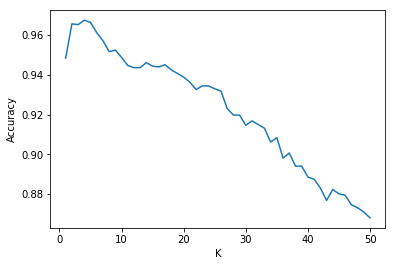

In [28]:
# plot the results of K values and accuracy score
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_values, accuracy_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0,0.5,'Accuracy')

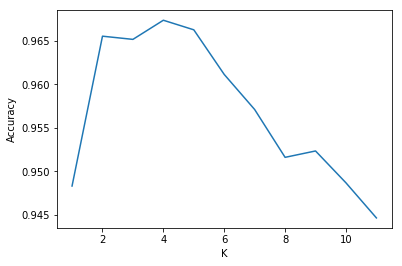

In [29]:
plt.plot(k_values[:11], accuracy_scores[:11])
plt.xlabel('K')
plt.ylabel('Accuracy')

Zooming into the resulting graph, it appears that a k-value of 4 yields the highest performance on our test set: 0.96737. 

In [30]:
# it appears that k=4 yields the most accurate model:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(features_train, target_train)
target_predicted = model.predict(features_test)

print(accuracy_score(target_test, target_predicted))

0.967375366569


In [31]:
# run a prediction on the model:
observation_test = features_test.iloc[443]
model.predict([observation_test])

array([0])

In [32]:
# checking the observed value for the observation:
target_test.iloc[443]

0

**Segment the Dataset and Discern Different Groups**
- We need to cluster the data without supervision.
- Use the KMeans algorithm, observing the results of k=6 and 4.
- Because this will be unsupervised, we will condider all features of the dataset in making our clusters.

We will perform a dimensionality reduction before visualizing the data points in 3D, using _Principal Component Analysis_ to reduce our dimensions from 34 down to 3:

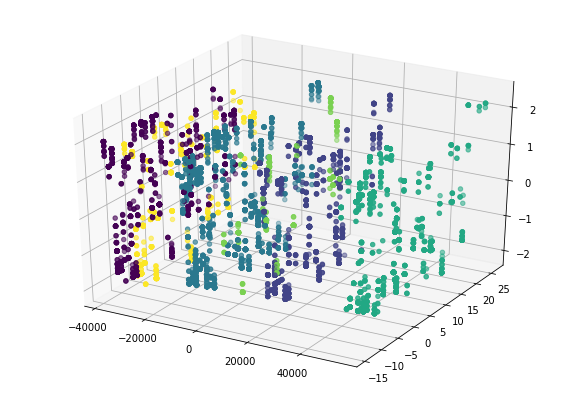

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans6 = KMeans(6, random_state = 0).fit_predict(clean_df3)

# reduce dimensionality so that we can plot it
pca = PCA(3)
pca_flattened = pca.fit_transform(clean_df3)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(pca_flattened[:, 0]).flatten()
y_ax = np.array(pca_flattened[:, 1]).flatten()
z_ax = np.array(pca_flattened[:, 2]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = kmeans6, marker = 'o')
plt.show()

The PCA reduced plot shows distinct groups, but we will try k=4 and check for a more clear distinction:

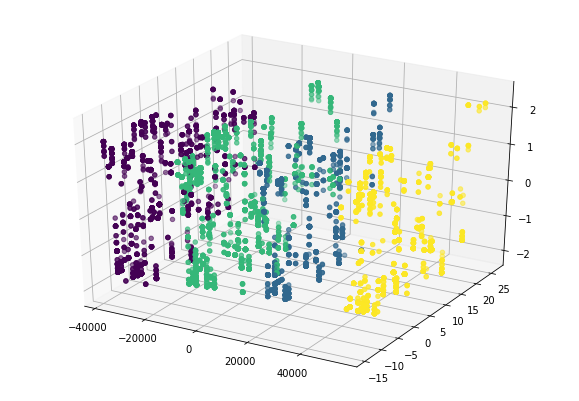

In [34]:
# The PCA reduced plot shows distinct groups, but we
# will try k=4 and check for a more clear distinction

kmeans4 = KMeans(4, random_state = 0).fit_predict(clean_df3)

# reduce dimensionality so that we can plot it
pca = PCA(3)
pca_flattened = pca.fit_transform(clean_df3)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(pca_flattened[:, 0]).flatten()
y_ax = np.array(pca_flattened[:, 1]).flatten()
z_ax = np.array(pca_flattened[:, 2]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = kmeans4, marker = 'o')
plt.show()

It appears that there are 4 distinct groups within the dataset, we will observe the results of a 2 Dimensional plot of the data points and try to discern any patterns:

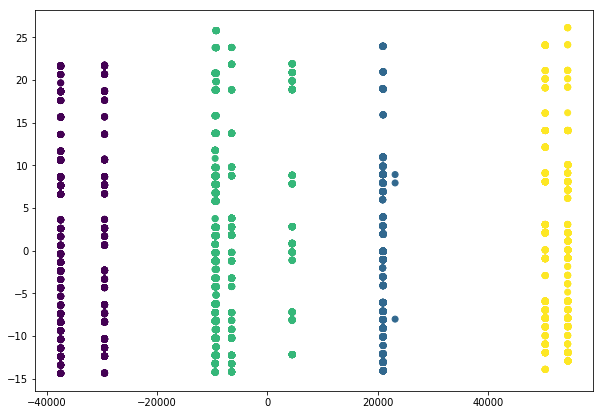

In [35]:
pca = PCA(2)
pca_flattened = pca.fit_transform(clean_df3)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
x_ax = np.array(pca_flattened[:, 0]).flatten()
y_ax = np.array(pca_flattened[:, 1]).flatten()
ax.scatter(x_ax, y_ax, c = kmeans4, marker = 'o')
plt.show()

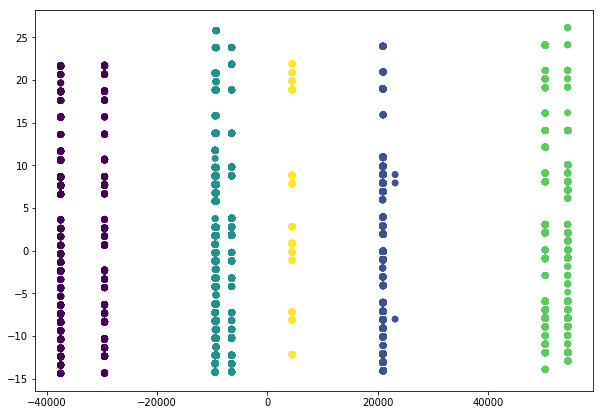

In [36]:
# it appears that the overall number of distinct groups is 4 to 5

kmeans5 = KMeans(5, random_state = 0).fit_predict(clean_df3)

# reduce dimensionality so that we can plot it
pca = PCA(2)
pca_flattened = pca.fit_transform(clean_df3)

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
x_ax = np.array(pca_flattened[:, 0]).flatten()
y_ax = np.array(pca_flattened[:, 1]).flatten()
ax.scatter(x_ax, y_ax, c = kmeans5, marker = 'o')
plt.show()

The dimensionality reduced plot above shows that the variance is described by 5 distinct clusters.

In [37]:
# dimensionality reduced plot shows the variance is described
# by 5 distinct clusters shown above.

kmeans5

array([2, 1, 1, ..., 2, 3, 4], dtype=int32)